<a href="https://colab.research.google.com/github/biapeters/projeto-selecao-data-science/blob/main/Atividade_Somativa_1_tecnicasdeML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive
import matplotlib.pyplot as plt

# 1 - Carregar o dataset
# O dataset foi disponibilizado pela universidade e contém medições físicas realizadas pela NASA.
# Cada linha representa um teste, e o objetivo é prever o scaled-sound-pressure.
# Vamos carregar o arquivo diretamente do Google Drive e inspecionar sua estrutura.

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho do arquivo
path = '/content/drive/MyDrive/nasa/nasa.csv'

# Carregar o dataset
df = pd.read_csv(path, sep=';')

# Exibir as primeiras linhas
print("--- Primeiras 5 linhas do dataset ---")
display(df.head())

# Informações gerais
print("\n--- Informações do Dataset ---")
df.info()

# Estatísticas descritivas
print("\n--- Estatísticas Descritivas ---")
display(df.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Primeiras 5 linhas do dataset ---


,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461



--- Informações do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   attack-angle                         1503 non-null   float64
 2   chord-length                         1503 non-null   float64
 3   free-stream-velocity                 1503 non-null   float64
 4   suction-side-displacement-thickness  1503 non-null   float64
 5   scaled-sound-pressure                1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB

--- Estatísticas Descritivas ---


,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


from matplotlib import pyplot as plt
_df_0['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['attack-angle'].plot(kind='hist', bins=20, title='attack-angle')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['chord-length'].plot(kind='hist', bins=20, title='chord-length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['free-stream-velocity'].plot(kind='hist', bins=20, title='free-stream-velocity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='frequency', y='attack-angle', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='attack-angle', y='chord-length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='chord-length', y='free-stream-velocity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='free-stream-velocity', y='suction-side-displacement-thickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['attack-angle'].plot(kind='line', figsize=(8, 4), title='attack-angle')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['chord-length'].plot(kind='line', figsize=(8, 4), title='chord-length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['free-stream-velocity'].plot(kind='line', figsize=(8, 4), title='free-stream-velocity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# 2 - Definir variáveis preditoras (X) e alvo (y)
# O alvo é a coluna scaled-sound-pressure, e todas as demais colunas serão usadas como features.

target_column = 'scaled-sound-pressure'
features = [col for col in df.columns if col != target_column]

X = df[features]
y = df[target_column]

print(f"Features (X): {features}")
print(f"Alvo (y): {target_column}")

Features (X): ['frequency', 'attack-angle', 'chord-length', 'free-stream-velocity', 'suction-side-displacement-thickness']
Alvo (y): scaled-sound-pressure


In [ ]:
# 3 - Dividir os dados em treino e teste
# Treino:75%
# Teste:25%
# A divisão é importante para avaliar o modelo com dados que ele nunca viu.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f"Tamanho total: {len(df)} registros")
print(f"Treino: {len(X_train)} registros (75%)")
print(f"Teste: {len(X_test)} registros (25%)")


Tamanho total: 1503 registros
Treino: 1127 registros (75%)
Teste: 376 registros (25%)


In [ ]:
# 4 - Preparação dos dados
# Vamos aplicar duas técnicas principais:
# Normalização (StandardScaler) - garante que todas as features fiquem na mesma escala.
# Seleção de atributos (SelectKBest) - escolhe automaticamente as variáveis mais relevantes para prever o alvo.

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converter de volta para DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

print("--- Normalização concluída ---")
display(X_train_scaled.head())

# Seleção de atributos
k_best = 4
selector = SelectKBest(score_func=f_regression, k=k_best)
selector.fit(X_train_scaled, y_train)

selected_features = X_train_scaled.columns[selector.get_support()]
print(f"As {k_best} melhores features selecionadas são: {list(selected_features)}")

X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

print(f"\nDimensão original: {X_train_scaled.shape}")
print(f"Após seleção: {X_train_selected.shape}")

--- Normalização concluída ---


,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness
0,-0.408282,-0.001525,-0.391598,1.275631,-0.480156
1,-0.593070,0.290730,-0.934440,0.264284,-0.428976
2,-0.593070,2.663157,-1.205862,-0.753464,0.912991
3,-0.285090,1.528518,-0.391598,1.275631,2.513970
4,-0.593070,0.376688,-0.391598,-0.753464,0.110067


As 4 melhores features selecionadas são: ['frequency', 'chord-length', 'free-stream-velocity', 'suction-side-displacement-thickness']

Dimensão original: (1127, 5)
Após seleção: (1127, 4)


In [ ]:
# 5 - Treinamento do modelo
# Usaremos o Random Forest Regressor, um algoritmo supervisionado baseado em várias árvores de decisão. Ele é robusto, lida bem com dados não lineares e fornece bons resultados mesmo sem ajuste fino.

model = RandomForestRegressor(n_estimators=100, random_state=42)
print("Treinando o modelo...")
model.fit(X_train_selected, y_train)
print("Treinamento concluído!")

print("Treinamento finalizado!")

Treinando o modelo...
Treinamento concluído!
Treinamento finalizado!


In [ ]:
# 6 - Predição e Avaliação do modelo
# Agora faremos predições com a base de teste e avaliaremos o desempenho com métricas adequadas a problemas de regressão:
# R² (Coeficiente de Determinação) - mede a qualidade do ajuste.
# MAE (Erro Absoluto Médio) - erro médio em valores absolutos.
# RMSE (Raiz do Erro Quadrático Médio) - dá peso maior a grandes erros.

# Fazer predições
y_pred = model.predict(X_test_selected)

# Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Métricas de Avaliação ---")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f} dB")
print(f"RMSE: {rmse:.4f} dB")


--- Métricas de Avaliação ---
R²: 0.9287
MAE: 1.3340 dB
RMSE: 1.8441 dB


In [ ]:
# 7 - Comparação entre valores reais e previstos

results_df = pd.DataFrame({
    'Valor Real': y_test.reset_index(drop=True),
    'Valor Previsto': y_pred
})

display(results_df.head(10))

,Valor Real,Valor Previsto
0,125.045,123.43569
1,118.767,119.27363
2,120.233,119.14625
3,137.047,136.55314
4,134.556,134.25654
5,120.766,123.55311
6,124.525,123.81855
7,136.798,134.55060
8,130.123,133.44224
9,123.991,128.18886


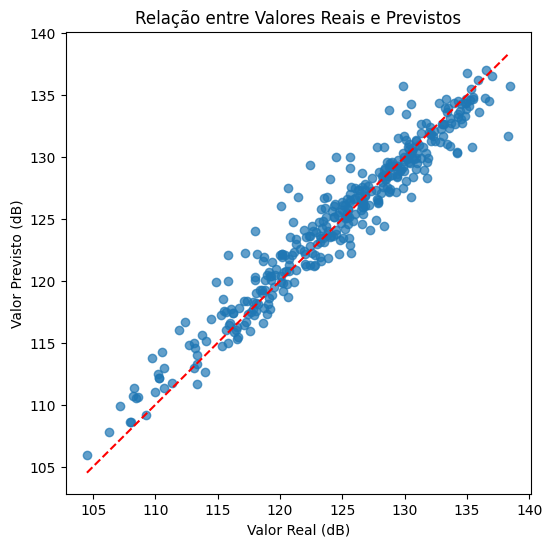

In [ ]:
# 8 - Visualização Gráfica
# O gráfico abaixo mostra a relação entre os valores reais e os previstos. Quanto mais próximos os pontos estiverem da diagonal, melhor o modelo.

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Valor Real (dB)")
plt.ylabel("Valor Previsto (dB)")
plt.title("Relação entre Valores Reais e Previstos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


In [ ]:
# Conclusão
# - O problema tratado é de regressão supervisionada.
# - Foram aplicadas técnicas de normalização e seleção de atributos.
# - O modelo escolhido foi o Random Forest Regressor, da biblioteca scikit-learn.
# - As métricas apresentaram desempenho satisfatório para uma primeira versão.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Atividade_Somativa_1_tecnicasdeML.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Atividade_Somativa_1_tecnicasdeML.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 621608 bytes to /content/drive/MyDrive/Atividade_Somativa_1_tecnicasdeML.html


In [36]:
from google.colab import files
files.download("/content/drive/MyDrive/Atividade_Somativa_1_tecnicasdeML.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>